<a href="https://colab.research.google.com/github/Amirhatamian/PY/blob/main/SocialResearchf21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploraion and Data Cleaning 

In [27]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [28]:
us_df = pd.read_csv('US Police shootings in from 2015-22.csv')

**About Dataset**: 

Below are lists of people killed by law enforcement in the United States, both on duty and off duty. Although Congress instructed the Attorney General in 1994 to compile and publish annual statistics on police use of excessive force, this was never carried out, and the Federal Bureau of Investigation does not collect these data.

Deaths by age group in 2015, according to The Counted

A New York Times study reported how outcomes of active shooter attacks varied with actions of the attacker, the police (42% of total incidents), and bystanders (including a "good guy with a gun" outcome in 5.1% of total incidents). The annual average number of justifiable homicides alone was previously estimated to be near 400. Updated estimates from the Bureau of Justice Statistics released in 2015 estimate the number to be around 930 per year, or 1,240 if assuming that non-reporting local agencies kill people at the same rate as reporting agencies.A 2019 study by Esposito, Lee, and Edwards states that police killings are a leading cause of death for men aged 25–29 at 1.8 per 100000, trailing causes such as accidental death (76.6 per 100000), suicide (26.7 per 100000), and other homicides (22.0 per 100000).

In [29]:
us_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


**Dataset Items:**

* **id:** Serial No
* **name:** Name of the victim
* **date:** Date of the occurance
* **manner_of_death:** In which way the victim died
* **armed:** Used weapon of the victim
* **age:** Age of the victim
* **gender:** Gender of the victim
* **race:** Race of the victim
* **city:** City of the occurance
* **state:** State of the occurance
* **signs_of_mental_illness:** Either victim shows sign of mental illness or not
* **threat_level:** Threat level from the victim
* **flee:** Either victim fleed or not, if fleed then used vehicle
* **body_camera:** Either the occurance is recorded using camera or not
* **longitude:** Longitude of the place of occurance
* **latitude:** Latitude of the place of occurance
* **is_geocoding_exact:** Either the place of occurance is exactly available or not



In [30]:
us_df.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True
7728,7729,Reginald Lamont Grant,2022-09-07,shot,gun,30.0,M,NaN,Columbus,GA,False,attack,Foot,False,NaN,NaN,True


In [31]:
us_df.shape

(7729, 17)

In [32]:
print("\n\033[1mGlimpse of Dataset:\033[0m")
us_df.head().style.set_properties(**{"background-color": "lightblue ","color":"#092434","border": "1.5px #ddab46"})


Glimpse of Dataset:


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.000000,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122000,47.247000,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.000000,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892000,45.487000,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.000000,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281000,37.695000,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.000000,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422000,37.763000,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.000000,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692000,40.384000,True


In [33]:
print("\n\033[1mSummary of Dataset:\033[0m")
us_df.describe().style.set_properties(**{"background-color": "lightblue","color":"#092434","border": "1.5px #ddab46"})


Summary of Dataset:


,id,age,longitude,latitude
count,7729.000000,7247.000000,6892.000000,6892.000000
mean,3865.000000,37.178971,-97.059875,36.682999
std,2231.314448,12.966191,16.595557,5.402749
min,1.000000,2.000000,-160.007000,19.498000
25%,1933.000000,27.000000,-112.039000,33.480000
50%,3865.000000,35.000000,-94.226000,36.104500
75%,5797.000000,45.000000,-83.073250,40.032250
max,7729.000000,92.000000,-67.867000,71.301000


In [34]:
us_df.describe(include="object").T.style.set_properties(**{"background-color": "lightblue","color":"#452912","border": "1.5px #ddab46"})

,count,unique,top,freq
name,7312,7280,Michael Johnson,3
date,7729,2620,2018-01-06,9
manner_of_death,7729,2,shot,7390
armed,7520,104,gun,4407
gender,7709,2,M,7361
race,6269,6,W,3198
city,7729,3148,Los Angeles,128
state,7729,51,CA,1114
threat_level,7729,3,attack,4875
flee,6854,4,Not fleeing,4336


In [35]:
us_df.duplicated().sum()

0

In [36]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

In [37]:
us_df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [38]:
us_df.corr().style.set_properties(**{"background-color": "lightblue ","color":"#092434","border": "1.5px #ddab46"})

<ipython-input-38-7349fbaeda30>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,age,signs_of_mental_illness,body_camera,longitude,latitude,is_geocoding_exact
id,1.000000,0.026014,-0.108246,0.093273,0.020586,0.007124,-0.017828
age,0.026014,1.000000,0.098243,-0.052729,0.059376,-0.016994,-0.001531
signs_of_mental_illness,-0.108246,0.098243,1.000000,0.045474,0.025324,0.029995,0.011944
body_camera,0.093273,-0.052729,0.045474,1.000000,-0.047607,0.010161,0.004413
longitude,0.020586,0.059376,0.025324,-0.047607,1.000000,-0.115223,-0.004371
latitude,0.007124,-0.016994,0.029995,0.010161,-0.115223,1.000000,-0.011820
is_geocoding_exact,-0.017828,-0.001531,0.011944,0.004413,-0.004371,-0.011820,1.000000


In [39]:
us_df.isnull()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
7725,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
7726,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7727,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [40]:
print(f"Null values of the Dataset :")
us_df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "lightblue","color":"#452912","border": "1.5px #ddab46"})

Null values of the Dataset :


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,0,417,0,0,209,482,20,1460,0,0,0,0,875,0,837,837,0


In [41]:
# Check for null values.
for col in us_df.columns:
  null_rate = us_df[col].isnull().sum() / len(us_df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in name : 5.3952645879156425%
Percentage of null values in armed : 2.7041014361495663%
Percentage of null values in age : 6.236253072842541%
Percentage of null values in gender : 0.25876568766981495%
Percentage of null values in race : 18.889895199896493%
Percentage of null values in flee : 11.320998835554406%
Percentage of null values in longitude : 10.829344028981756%
Percentage of null values in latitude : 10.829344028981756%


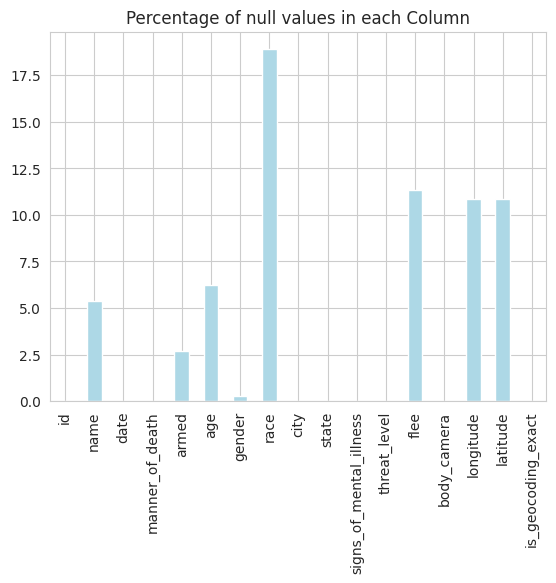

In [42]:
null_percent = us_df.isnull().sum()/us_df.shape[0]*100
null_percent.plot(kind='bar', color='lightblue')
plt.title("Percentage of null values in each Column")
plt.show()

In [43]:
us_df.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {us_df.shape}")
print(f"After dropping null values, null values of the Dataset :")
us_df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "lightblue","color":"#452912","border": "1.5px #ddab46"})

After dropping null values, the shape of the Dataset is (5070, 17)
After dropping null values, null values of the Dataset :


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Data Preprocessing**

In [44]:
states = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'IA': 'Iowa',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MS': 'Mississippi',
        'MO': 'Missouri',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NV': 'Nevada',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming',
        'DC': 'District of Columbia',
        'MP': 'Northern Mariana Islands',
        'PW': 'Palau',
        'PR': 'Puerto Rico',
        'VI': 'Virgin Islands',
        'AA': 'Armed Forces Americas (Except Canada)',
        'AE': 'Armed Forces Africa/Canada/Europe/Middle East',
        'AP': 'Armed Forces Pacific'
        }

In [45]:
#Drop extra columns
us_df.drop(['id', 'longitude', 'latitude', 'is_geocoding_exact'], inplace = True , axis =1)


In [46]:
us_df["State"] = us_df["state"].replace('states')
us_df['date'] = pd.to_datetime(us_df['date'])
us_df['Year'] = us_df['date'].dt.year
us_df['Month'] = us_df['date'].dt.month
us_df['Day'] = us_df['date'].dt.day
us_df["manner_of_death"].replace({"shot":"Shot", "shot and Tasered":"Shot and Tasered"}, inplace = True)
us_df["armed"].replace({"gun":"Gun", "knife":"Knife", "unarmed":"Unarmed", "undetermined":"Undetermined", "vehicle":"Vehicle", "toy weapon":"Toy Weapon", "unknown weapon":"Unknown Weapon", "machete":"Machete"}, inplace = True)
us_df["gender"].replace({"M":"Male", "F":"Female"}, inplace = True)


In [47]:
us_df["signs_of_mental_illness"].replace({True:"Abnormal", False:"Normal"}, inplace = True)
us_df["body_camera"].replace({True:"Available", False:"Not Available"}, inplace = True)
us_df["race"].replace({"W":"White", "B":"Black", "H":"Hispanic", "A":"Asian", "N":"Native", "O":"Other"}, inplace = True)
us_df["threat_level"].replace({"attack":"Attack", "other":"Not Attack", "undetermined":"Unknown"}, inplace = True)
us_df["flee"].replace({"Not fleeing":"Not Fleeing", "Other":"Unknown"}, inplace = True)
us_df.rename(columns={"name": "Name","date": "Date","manner_of_death": "Manner Of Death","armed":"Armed","age":"Age","gender":"Gender","race":"Race","city":"City","state": "State Code","signs_of_mental_illness":"Mental Illness","threat_level":"Threat Level","flee":"Flee","body_camera":"Footage"}, inplace = True)
us_df = us_df[["Year","Month","City","State", "State Code","Name","Age","Gender","Race","Mental Illness","Armed","Threat Level","Manner Of Death","Flee","Footage"]]


In [48]:
print("\n\033[1mGlimpse of the final dataset:\033[0m")
us_df.head().style.set_properties(**{"background-color": "lightblue", "color": "#452912", "border": "1.5px #ddab46"})



Glimpse of the final dataset:


,Year,Month,City,State,State Code,Name,Age,Gender,Race,Mental Illness,Armed,Threat Level,Manner Of Death,Flee,Footage
0,2015,1,Shelton,WA,WA,Tim Elliot,53.000000,Male,Asian,Abnormal,Gun,Attack,Shot,Not Fleeing,Not Available
1,2015,1,Aloha,OR,OR,Lewis Lee Lembke,47.000000,Male,White,Normal,Gun,Attack,Shot,Not Fleeing,Not Available
2,2015,1,Wichita,KS,KS,John Paul Quintero,23.000000,Male,Hispanic,Normal,Unarmed,Not Attack,Shot and Tasered,Not Fleeing,Not Available
3,2015,1,San Francisco,CA,CA,Matthew Hoffman,32.000000,Male,White,Abnormal,Toy Weapon,Attack,Shot,Not Fleeing,Not Available
4,2015,1,Evans,CO,CO,Michael Rodriguez,39.000000,Male,Hispanic,Normal,nail gun,Attack,Shot,Not Fleeing,Not Available


# **Expoloraty Data Analysis**


Most occurance in Each Year :


<function matplotlib.pyplot.show(close=None, block=None)>

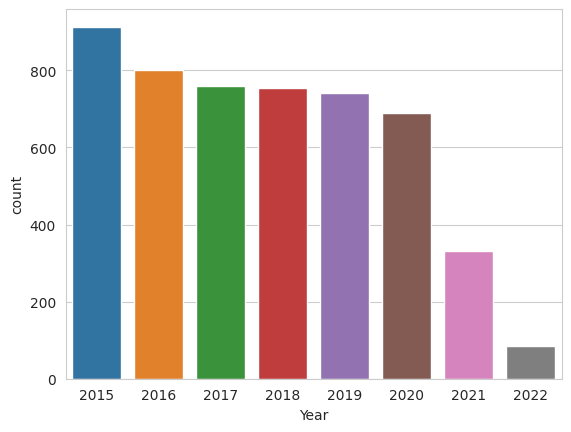

In [49]:
print("\n\033[1mMost occurance in Each Year :\033[0m")
sns.countplot(data = us_df, x = 'Year')
plt.show

In [50]:
gp_year = us_df.groupby("Year")
fig = px.line(gp_year.size(), title='Number of Shootings by Year', markers=True)
fig.show()


In [56]:
gp_month = us_df.groupby("Month")
fig = px.line(gp_month.size(), title='Number of Shootings by Month', markers=True)
fig.show()


**Insights:**

* The insights from the chart reveal that the year **2015** had the lowest occurrence of incidents. Additionally, the chart illustrates a slight decrease in the occurrences over the years.

* In the month of **March**, there is a higher occurrence of shootings compared to other months. On the other hand, the month of **November** has the lowest number of shootings.



In [59]:
fig = px.density_heatmap(us_df, x="Year", y="Month", title='Heatmap of Month and Year Shootings', color_continuous_scale='Viridis')
fig.show()

**Insights:**

* Most shootings occured in the **year 2020** in the month of **May.**
 

Place of Occurance:


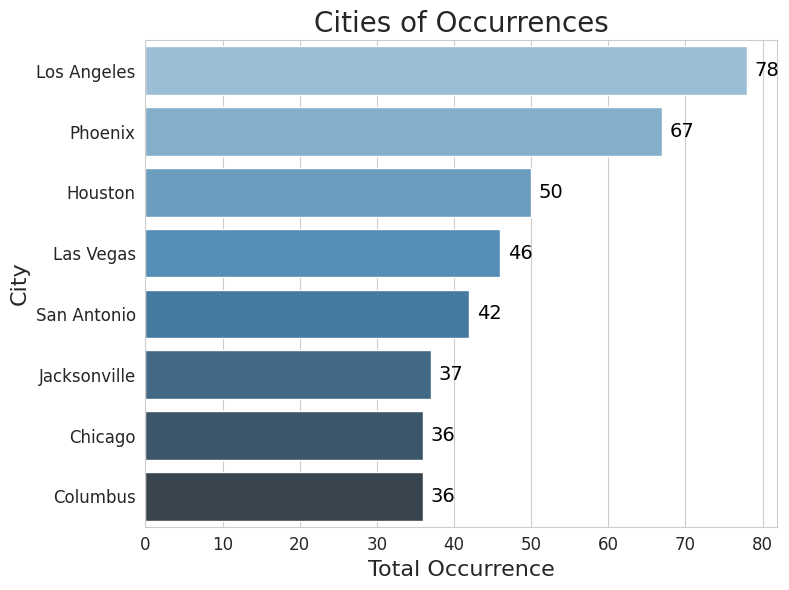

In [52]:
print('Place of Occurance:')
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
# Set a custom color palette
palette = sns.color_palette("Blues_d", 8)
# Plot the count of occurrences by city
city_counts = us_df["City"].value_counts().head(8)
p = sns.barplot(x=city_counts.values, y=city_counts.index, palette=palette)
plt.title("Cities of Occurrences", fontsize=20)
plt.xlabel("Total Occurrence", fontsize=16)
plt.ylabel("City", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add labels to the bars
for i, v in enumerate(city_counts.values):
    p.text(v + 1, i, str(v), color='black', fontsize=14, va='center')
plt.tight_layout()
plt.show()


**Insights:**

* The analysis reveals that among the top eight cities of occurrences, **Los Angeles** has experienced the highest number of incidents, totaling **78 occurance**. 
* Both **Chicago** and **Columbus** have each encountered **36 incidents**, making it the **lowest number** of occurrences among the top eight cities.









